为什么读取data中没有女垒

In [1]:
import os
import jieba
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import platform
from wordcloud import WordCloud

In [2]:
# 添加自定义词语
jieba.add_word('科比')

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.690 seconds.
Prefix dict has been built successfully.


In [3]:
# 停用词列表
stopwords = []

# 加载停用词列表
with open('../stopwords/cn_stopwords.txt', encoding='utf-8') as f:
    for line in f:
        stopwords.append(line.strip())

with open('../stopwords/hit_stopwords.txt', encoding='utf-8') as f:
    for line in f:
        stopwords.append(line.strip())

with open('../stopwords/baidu_stopwords.txt', encoding='utf-8') as f:
    for line in f:
        stopwords.append(line.strip())

with open('../stopwords/scu_stopwords.txt', encoding='utf-8') as f:
    for line in f:
        stopwords.append(line.strip())

In [4]:
def preprocess(text):
    # 分词
    words = jieba.lcut(text)
    # 去除虚词
    # words = [word for word in words if word not in stopwords]
    words = [word for word in words if word not in stopwords]
    f_word = " ".join(words)
    # 返回处理后的词语列表
    return f_word, words

In [5]:
# 读取train数据集
data = []
labels = []
raw_data = []
f_word_list = []
for root, dirs, files in os.walk('./Chinese_Information_Retrieval_Task_Dataset/train'):
    print('dealing with {}'.format(root.split('/')[-1]))
    for file in files:
        with open(os.path.join(root, file), 'r', encoding='GB2312',errors='ignore') as f:
            content = f.read()
            raw_data.append(content)
            f_word, words = preprocess(content)
            data.append(' '.join(words))
            labels.append(root.split('/')[-1])
            f_word_list.append(f_word)

dealing with train
dealing with 22
dealing with 26
dealing with 5
dealing with 21
dealing with 13
dealing with 9
dealing with 15
dealing with 14
dealing with 10
dealing with 8
dealing with 2
dealing with 17
dealing with 12
dealing with 23
dealing with 4
dealing with 18
dealing with 24
dealing with 20
dealing with 3
dealing with 25
dealing with 19
dealing with 7
dealing with 11
dealing with 16
dealing with 6
dealing with 1


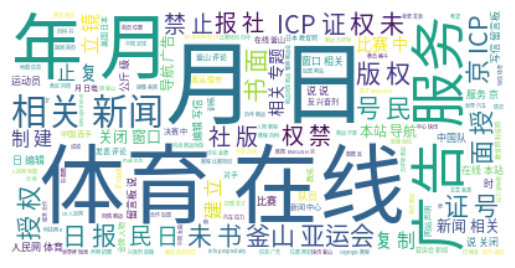

In [6]:
f_words = " ".join(f_word_list)

# 根据操作系统类型设置中文字体路径
if platform.system() == 'Windows':
    font_path = r"C:\Windows\Fonts\simsun.ttc"
elif platform.system() == 'Darwin':
    font_path = "/Library/Fonts/Songti.ttc"
else:
    font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"

# 生成词云图，并指定中文字体
wordcloud = WordCloud(font_path=font_path, background_color="white").generate(f_words)

# 显示词云图
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [7]:
# 检测是否data已包含全部的训练数据
len(data)

4411

In [8]:
data

['\n \n 中体网     Sinosports net   \n \n www sinosports net     \n \n 世界足坛 即时比分 更新                   \n \n ・ 中国 足球彩票   HOT     \n ・ 2002 2003   NBA       \n ・ 2002 2003 意甲 联赛     \n ・ 2002 2003 英超 联赛     \n ・ 2002 2003 德甲联赛     \n ・ 2002 2003 西甲 联赛     \n ・ 中国 足球 职业联赛     \n ・ 中国 足球 国家队       \n ・ 2002 2003 欧洲 冠军杯       \n ・ 2002 2003 欧洲联盟 杯         \n \n 国际足球 联合会杯       \n \n 澳大利亚 网球 公开赛       \n \n 世界杯 短池 游泳 系列赛       \n \n WRC 世界 汽车 拉力 锦标赛       \n \n 全国 第十届 冬季 运动会       \n \n 2003 年 拳击 格斗 征订         \n \n □   中体网 足球 娱乐 频道       \n \n   世界 汽车 拉力 锦标赛 瑞典 站 \n □   拳击 格斗 2003 年 期 精彩 插图 欣赏 \n   02 03 世界杯 短池 德国 站 精彩图片 \n 更       \n \n \n 美国 女将 证明   俄罗斯 时代 虚假 繁荣 \n 2003 年 月 日   12 43 \n \n \u3000 \u3000 单看 温网 女单 比赛 16 强 名单 人会 结论 ― ― 美国 女网 依然 威廉姆斯 姐妹 达文波特 卡普 里亚蒂 两名 老将 支撑 门面 俄罗斯 新人辈出 成名 已久 德蒙 蒂埃娃 米斯 金娜 中坚力量 佐娜 列娃 新鲜出炉 萨 拉波娃 库兹涅 索娃 俄罗斯 声势 煊赫 一度 风头 压倒 女子 网球 界 多年 老大 美国   \n \n   \u3000 \u3000 决赛 俄罗斯 球迷 残酷 美国 女将 实力 证明 俄罗斯 时代 一场 虚假 繁荣 美 俄 女将 场 对抗 中 威廉姆斯 两个 轻取 德蒙 蒂埃娃 卡普 里亚蒂 完胜 米斯 金娜 佐娜 列娃 下场 强 不到 对手

In [9]:
# 使用TF-IDF算法将文本转换成向量
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data)

In [10]:
test_content = []
with open('./Chinese_Information_Retrieval_Task_Dataset/test.txt', 'r', encoding='GB2312', errors='ignore') as f:
    lines = f.readlines()
    for line in lines:
        line = line[3:-1]
        test_content.append(line)
print(test_content)

['中国女曲能否击败韩国圆梦', '女垒锦标赛的会徽和吉祥物“丫丫”在南京首次亮相', '男子十米中国队双保险失灵 加澳抢得冠亚军', '中国体操在悉尼的辉煌与遗憾', '棒球联赛第二阶段首回合 沪上闷热击溃猛虎', '老帅盛赞国奥小将：具备亚洲顶级水平', '全国山地车冠军赛第二站：马艳萍获女子越野赛桂冠', '摩托罗拉世界名校赛艇对抗赛', '网球女单开赛：塞莱斯首战轻取对手', ' NBA：湖人主帅杰克逊支持科']


In [11]:
# 将查询文本转换为tf-idf向量
query_vector = []
test_words = []
for i in range(len(test_content)):
    f_word, words = preprocess(test_content[i])
    words = [x for x in words if x != ' ']
    test_words.append(words)
    print(words)
    tmp = vectorizer.transform(words)
    query_vector.append(tmp)

['中国', '女曲', '击败', '韩国', '圆梦']
['女垒', '锦标赛', '会徽', '吉祥物', '丫丫', '南京', '首次', '亮相']
['男子', '十米', '中国队', '双保险', '失灵', '加澳', '抢', '冠亚军']
['中国', '体操', '悉尼', '辉煌', '遗憾']
['棒球', '联赛', '第二阶段', '首回合', '沪', '闷热', '击溃', '猛虎']
['老帅', '盛赞', '国奥', '小将', '具备', '亚洲', '顶级', '水平']
['全国', '山地车', '冠军赛', '第二站', '马艳萍', '获', '女子', '越野赛', '桂冠']
['摩托罗拉', '世界', '名校', '赛艇', '对抗赛']
['网球', '女单', '开赛', '塞莱斯', '首战', '轻取', '对手']
['NBA', '湖人', '主帅', '杰克逊', '支持', '科']


In [18]:
# 计算查询文本与文本库中的每个文本的相似度得分
similarity_scores = cosine_similarity(query_vector[0], tfidf_matrix)
similarity_scores

array([[0.02798766, 0.04427288, 0.06197004, ..., 0.044749  , 0.1026795 ,
        0.2388422 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03339047, 0.        , ..., 0.        , 0.02323217,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01579025, 0.01992747,
        0.02015356],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
# 对相似度得分进行排序，并返回排名前K的文本
top_k = 10
indices = np.argsort(similarity_scores)[1][::-1][:top_k]
for i, idx in enumerate(indices):
    print(f"Top {i+1} match: {raw_data[idx]}")
    print("===================================================================================================")

Top 1 match: 

一年迈出三大步 中国女曲世界杯赛喜获铜牌  

　　体育在线 >> 小球 >> 曲棍球  

 2002年12月09日09:13  

 一年迈出三大步 中国女曲世界杯赛喜获铜牌


  　中新网12月9日电 中国女曲在澳大利亚帕斯举行的女曲世界杯赛中，2比0击败东道主澳大利亚队，最终获得了第三名，这是中国队在世界杯历史上的最好战绩。

    本场比赛，中国队状态明显好于半决赛。上半场第13分钟，中国队首次获得短角球机会便告得手，第32分钟，澳大利亚队又被判罚了短角球。中国队通过配合再次创造出射门机会，由队长陈朝霞将比分扩大为2比0。

    至此，中国队在本次女曲世界杯上的比赛已经全部结束。在这9场比赛中，中国女曲表现出明显的进步，并已经具备了与世界一流强队竞争的能力。不过主教练金昶佰认为这只是个开始，这支队伍在技战术和大赛经验方面还很稚嫩，只要假以时日，这支铁军有望向世界冠军发起冲击。

    本次比赛，是中国女曲在今年参加的第三次重大赛事，中国队在8月份的冠军杯赛中，首获冠军。在十月份的亚运会比赛中，战胜韩国队，再获冠军。中国女曲在连续参加三次大赛，没有调整和休息的情况下，仍取得优异成绩，实属不易。   

中国新闻网 2002年12月09日    

给编辑写信  
到留言板说说  关闭窗口       

相关新闻 

相关专题

中国夺得女曲世界杯铜牌 周婉锋带球突破

阿根廷曲棍球队战胜荷兰队首次获得世界杯冠军

快讯-阿根廷点球4-3胜荷兰 女曲世界杯夺冠

女曲世界杯：中国队2-0击败澳大利亚获铜牌

快讯:中国队击败东道主获女曲世界杯赛铜牌

与澳大利亚争铜牌中国女曲惟有放手一搏

借鉴女曲经验 中国男曲欲聘韩帅打造国家队

中国女曲无缘世界杯冠军 奖牌离中国队有多远？

中国队一球不敌荷兰队 无缘女曲世界杯决赛

快讯：女曲世界杯半决赛 中国女曲0-1不敌荷兰队 

小球

小球专题

2002女子曲棍球世界杯

关于人民网 关于体育在线 本站导航 广告服务 联系我们 京ICP证000006号 

人 民 日 报 社 版 权 所 有 ， 未 经 书 面 授 权 禁 止 复 制 或 建 立 镜 像       
Top 2 match: 

釜山亚运会 

新闻中心 快讯 釜山评论 金牌人物 赛程 百科书 图酷

In [14]:
# 计算查询文本与文本库中的每个文本的相似度得分
similarity_scores = cosine_similarity(query_vector[1], tfidf_matrix)
similarity_scores

array([[0.        , 0.        , 0.        , ..., 0.01425678, 0.        ,
        0.        ],
       [0.03005431, 0.04754207, 0.04990951, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03754378, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0513241 , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
# 对相似度得分进行排序，并返回排名前K的文本
top_k = 10
indices = np.argsort(similarity_scores)[0][::-1][:top_k]
for i, idx in enumerate(indices):
    print(f"Top {i+1} match: {raw_data[idx]}")
    print("===================================================================================================")

Top 1 match: 

世锦赛上杀入四强 中国女垒提前“进雅典”  

　　体育在线 >> 小球 >> 垒球  

 2002年8月05日14:02  

 世锦赛上杀入四强 中国女垒提前“进雅典”


　　在北京时间昨天上午进行的女垒世锦赛中，中国女垒以４比２战胜新西兰队，进入四强，并获得２００４年雅典奥运会入场券。而在另一场比赛中，中国台北队以４比２击败澳大利亚队，也进入了四强，与中国女垒携手进军雅典奥运会。

    在过去的一段时间里，中国女垒一直处于世界前列。１９９６年奥运会，中国女垒获亚军；上届奥运会，因负于老对手美国队，中国队获得第四名。不过，由于后备人才储备不足，中国女垒目前正面临前所未有的困难。尽管在本次世锦赛上拿到雅典奥运会入场券，要重现昔日辉煌还有一段路要走。 

《北京晨报》 2002年8月05日    

给编辑写信  
到留言板说说  关闭窗口       

相关新闻 

相关专题

第七届世界青年女子垒球锦标赛将在南京举行

垒联主席赞中国进步 青年女垒锦标赛明年南京举行

少了经验拚出精彩-与中国女垒领队同看中美战

中国队小组第二进复赛 女垒世锦赛达到预定目标

盛夏穿棉衣 胖妞巧接球―女垒世锦赛花絮

中国女垒教练朱慕德:0-4负于美国意在练兵 

关于人民网 关于体育在线 本站导航 广告服务 联系我们 京ICP证000006号 

人 民 日 报 社 版 权 所 有 ， 未 经 书 面 授 权 禁 止 复 制 或 建 立 镜 像       
Top 2 match: 

釜山亚运会 

新闻中心 快讯 釜山评论 金牌人物 赛程 百科书 图酷 反兴奋剂 直播 短信     

体育在线 >> 釜山亚运会 >> 釜山评论 >> 媒体评论   

 青黄不接的中国女垒依然有望奥运夺牌

 陈建    

　　亚运会女垒赛争夺已经进入关键时刻，在今天中国队以八比一大胜朝鲜队后，主教练王纯新表示，中国队虽然青黄不接，陷入历史低潮，但两年后的奥运会上，中国队仍然有夺牌的希望。

    近年来中国女垒队员青黄不接的局面令人担忧，队内两个年龄层泾渭分明，一层是已经有十多年球龄的即将退役的老队员，另一层则是二十岁上下的年轻选手，二十五岁的当打队员几近空白，如此严重的人才断层，令中国女垒近年来一直走下坡，与八年前扬威亚特兰大奥运会的日子

In [16]:
for i in range(2,7):
    print("检索信息：{}".format(test_content[i]))
    print("分词结果：{}".format(test_words[i]))
    print("检索结果如下：")
    similarity_scores = cosine_similarity(query_vector[i], tfidf_matrix)
    top_k = 10
    indices = np.argsort(similarity_scores)[1][::-1][:top_k]
    for i, idx in enumerate(indices):
        print(f"Top {i+1} match: {raw_data[idx]}")
        print("===================================================================================================")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

检索信息：男子十米中国队双保险失灵 加澳抢得冠亚军
分词结果：['男子', '十米', '中国队', '双保险', '失灵', '加澳', '抢', '冠亚军']
检索结果如下：
Top 1 match: 

再谈田亮胡佳失利 张挺：男十米台仍有优势  

　　体育在线 >> 游泳 >> 游泳专题 >> 第10届游泳世锦赛 >> 跳水  

 2003年7月20日20:04  

 再谈田亮胡佳失利 张挺：男十米台仍有优势


　　中新社巴塞罗那七月二十日电(记者高凯)世锦赛男子十米台比赛中，田亮、胡佳双双失守，“梦之队”在巴塞罗那再丢一金，但中国跳水队教练张挺依然认为：“比赛总是具有一定的偶然性，中国队在男子十米台上的优势依然存在。”

    对于爱徒田亮今天的失常表现，张挺称：“田亮今天发挥的确不好，但是这仅仅是他发挥的问题，到巴塞罗那后，他一直不适应这里的光线条件，加上今天右脚意外受伤，都影响了他的发挥。”针对田亮决赛时动作的难度在所有参赛选手中处在下风的情况，张挺说：“田亮今天没有夺冠与难度无关，主要是他今天发挥很不稳定，决赛里的六个动作，他只有两个跳出了平常的训练水平，四个都完成得很差，这种情形怎么会赢。”他进一步分析说：“不能说是对手强了，我们比不过了。今天最后拿金牌的加拿大的亚历山大总分也不过是七百一十多，田亮和胡佳发挥好的时候七百二七百三的总分是很正常的。”

    至于今天胡佳的失败，张挺说：“他最后一个动作难度很高，这种动作偶然性更大，而最后一轮有八个选手都选择了这个动作，加上他出场前亚历山大跳出了很高的分数，胡佳肯定心理压力很大。还有就是胡佳练这个动作时间不长，这次冲难度本来就是有风险的，我们知道有风险，但是必须冲，因为我们一切都要为奥运会的成功作准备。”

    张挺最后说：“我觉得这一次的失败并不能说明男子十米台上我们已经没有优势了，比赛不可能总是一个人赢，我认为我们的优势依然存在，只是输掉了这一次比赛。” 

中国新闻网 2003年7月20日    

给编辑写信  
到留言板说说  关闭窗口       

相关新闻 

相关专题

游泳世锦赛男子十米台 胡佳最后一跳出现失误

游泳世锦赛男子十米台 胡佳空中演绎跳水张力

总教练赵戈：游泳要吸取跳水教训 杨雨未必夺金

周继红直言胡佳最后一跳败因 跳水部主任说内情

国际泳联主席

In [17]:
for i in range(7,10):
    print("检索信息：{}".format(test_content[i]))
    print("分词结果：{}".format(test_words[i]))
    print("检索结果如下：")
    similarity_scores = cosine_similarity(query_vector[i], tfidf_matrix)
    top_k = 10
    indices = np.argsort(similarity_scores)[0][::-1][:top_k]
    for i, idx in enumerate(indices):
        print(f"Top {i+1} match: {raw_data[idx]}")
        print("===================================================================================================")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

检索信息：摩托罗拉世界名校赛艇对抗赛
分词结果：['摩托罗拉', '世界', '名校', '赛艇', '对抗赛']
检索结果如下：
Top 1 match: 

中体网 - Sinosports.net 

www.sinosports.net  

世界足坛即时比分(随时更新)         

・中国足球彩票 HOT  
・2002/2003 NBA   
・2002/2003意甲联赛  
・2002/2003英超联赛  
・2002/2003德甲联赛  
・2002/2003西甲联赛  
・中国足球职业联赛  
・中国足球国家队   
・2002/2003欧洲冠军杯   
・2002/2003欧洲联盟杯    

国际足球：联合会杯   

澳大利亚网球公开赛   

世界杯短池游泳系列赛   

WRC世界汽车拉力锦标赛   

全国第十届冬季运动会   

2003年《拳击与格斗》征订    

□ 中体网足球娱乐频道   

■ 世界汽车拉力锦标赛瑞典站
□ 《拳击与格斗》2003年3期精彩插图欣赏
■ 02-03世界杯短池德国站精彩图片
>>>更多   


摩托罗拉世界名校赛艇对抗赛即将在京举行
2001年8月8日 15:57

　　为祝贺北京申办2008年奥运会成功，加强世界著名大学间的体育文化交流，由国家体育总局、北京市人民政府主办、摩托罗拉(中国)电子有限公司冠名赞助，国家体育总局水上运动管理中心、北京京城水系旅游开发有限公司和梅珑广告公司承办的首届“摩托罗拉世界名校赛艇对抗赛”将于2001年9月在北京昆玉河拉开帷幕。据悉，这是中国名校与世界名校间的第一次大规模赛艇比赛。 


 　　国际奥委会执委、中国奥委会名誉主席、中国赛艇协会主席何振梁先生，北京市领导，摩托罗拉总公司资深副总裁兼个人通讯事业部亚太区总裁孔毅先生，参赛学校清华大学、复旦大学、上海交通大学及承办单位领导出席了2001年8月8日在中国大饭店举行的新闻发布会。 

 　　此次参赛队伍包括英国的牛津大学、剑桥大学，美国的哈佛大学、耶鲁大学，和中国的清华大学、复旦大学、上海交通大学等，赛程为6公里，期间还将举办赛艇文化广场活动，目前各项筹备工作正在紧张进行中。 

 　　在中国，高校赛艇对抗赛的兴起虽然只有短短三年，但已呈现出方兴未艾之势。1999年8月，北大、清华在北京昆玉河上举